In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Replace 'file.csv' with the actual name of your CSV file
file_path = 'C:/Users/fishm/Documents/UT Bootcamp/Project 1/Project-1/'
csv_file = 'us_disaster_declarations.csv'
url = file_path + csv_file
#print(url)

#df = pd.read_csv('C:/Users/fishm/Documents/UT Bootcamp/Project 1/us_disaster_declarations.csv')
us_disasters_df = pd.read_csv(url)

us_disasters_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [3]:
unique_disasters = us_disasters_df['incident_type'].unique()
unique_disasters

array(['Tornado', 'Flood', 'Fire', 'Other', 'Earthquake', 'Hurricane',
       'Volcanic Eruption', 'Severe Storm', 'Toxic Substances', 'Typhoon',
       'Drought', 'Dam/Levee Break', 'Snowstorm', 'Severe Ice Storm',
       'Freezing', 'Coastal Storm', 'Fishing Losses', 'Mud/Landslide',
       'Human Cause', 'Terrorist', 'Tsunami', 'Chemical', 'Biological',
       'Tropical Storm', 'Winter Storm'], dtype=object)

In [4]:
disaster_counts = us_disasters_df['incident_type'].value_counts()

# Print out the count of disaster-type instances
for disaster, count in disaster_counts.items():
    print(f"There are {count} occurrences of {disaster}")

There are 17490 occurrences of Severe Storm
There are 13045 occurrences of Hurricane
There are 10693 occurrences of Flood
There are 7857 occurrences of Biological
There are 3707 occurrences of Snowstorm
There are 3615 occurrences of Fire
There are 2942 occurrences of Severe Ice Storm
There are 1569 occurrences of Tornado
There are 1292 occurrences of Drought
There are 637 occurrences of Coastal Storm
There are 307 occurrences of Other
There are 301 occurrences of Freezing
There are 228 occurrences of Earthquake
There are 130 occurrences of Typhoon
There are 54 occurrences of Tropical Storm
There are 51 occurrences of Volcanic Eruption
There are 43 occurrences of Winter Storm
There are 42 occurrences of Fishing Losses
There are 37 occurrences of Mud/Landslide
There are 13 occurrences of Dam/Levee Break
There are 9 occurrences of Tsunami
There are 9 occurrences of Chemical
There are 9 occurrences of Toxic Substances
There are 7 occurrences of Human Cause
There are 5 occurrences of Terror

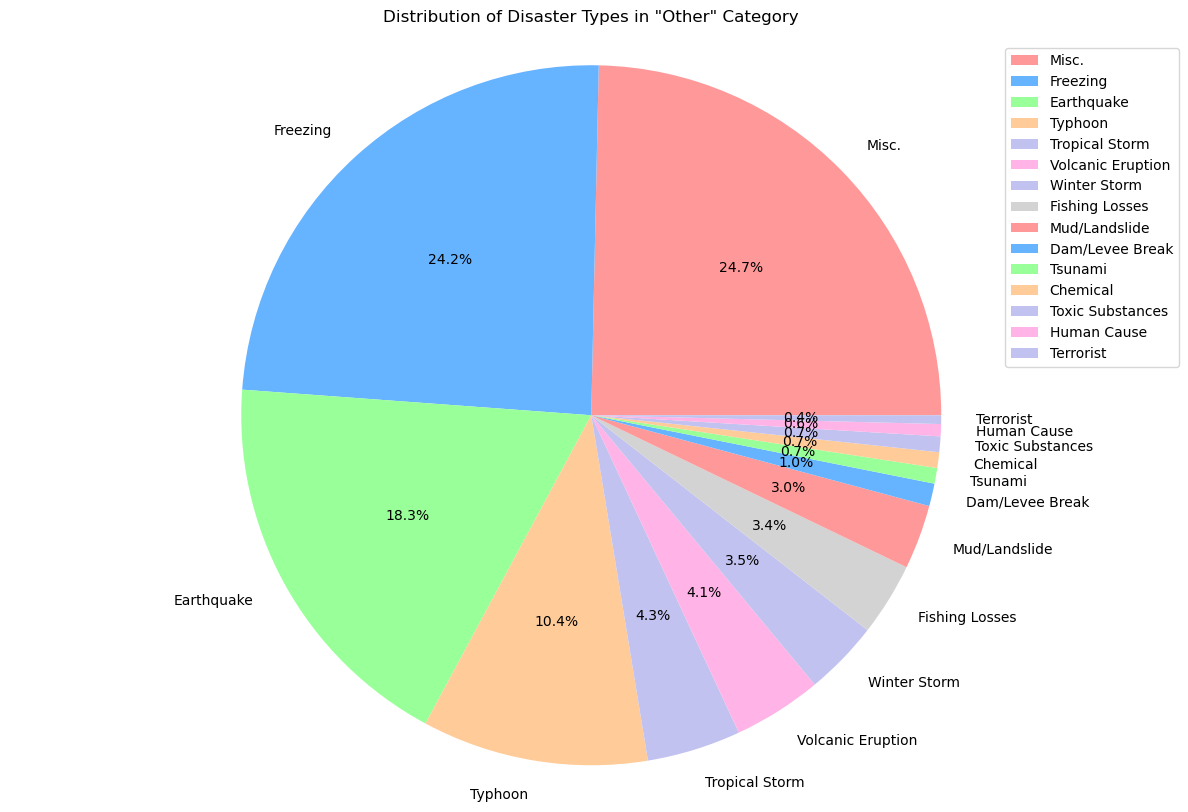

In [5]:
total_count = disaster_counts.sum()

# Identify disaster types with counts under 2%
threshold_percentage = 0.5
small_counts = disaster_counts[disaster_counts / total_count * 100 < threshold_percentage]
small_counts.rename(index={'Other': 'Misc.'}, inplace=True)
# Set custom colors for the pie chart (optional)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#d3d3d3']  # Add color for the "other" category

plt.figure(figsize=(15, 10))  # Adjust figure size for the "Other" pie chart

# Plot the pie chart for the "Other" category
plt.pie(small_counts, labels=small_counts.index, autopct='%1.1f%%', colors=colors)
plt.legend(small_counts.index, loc='center left', bbox_to_anchor=(0.85, 0.77))

plt.title('Distribution of Disaster Types in "Other" Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("graphics/other_category.png", bbox_inches='tight', dpi=300)

# Show the pie chart for the "Other" category
plt.show()

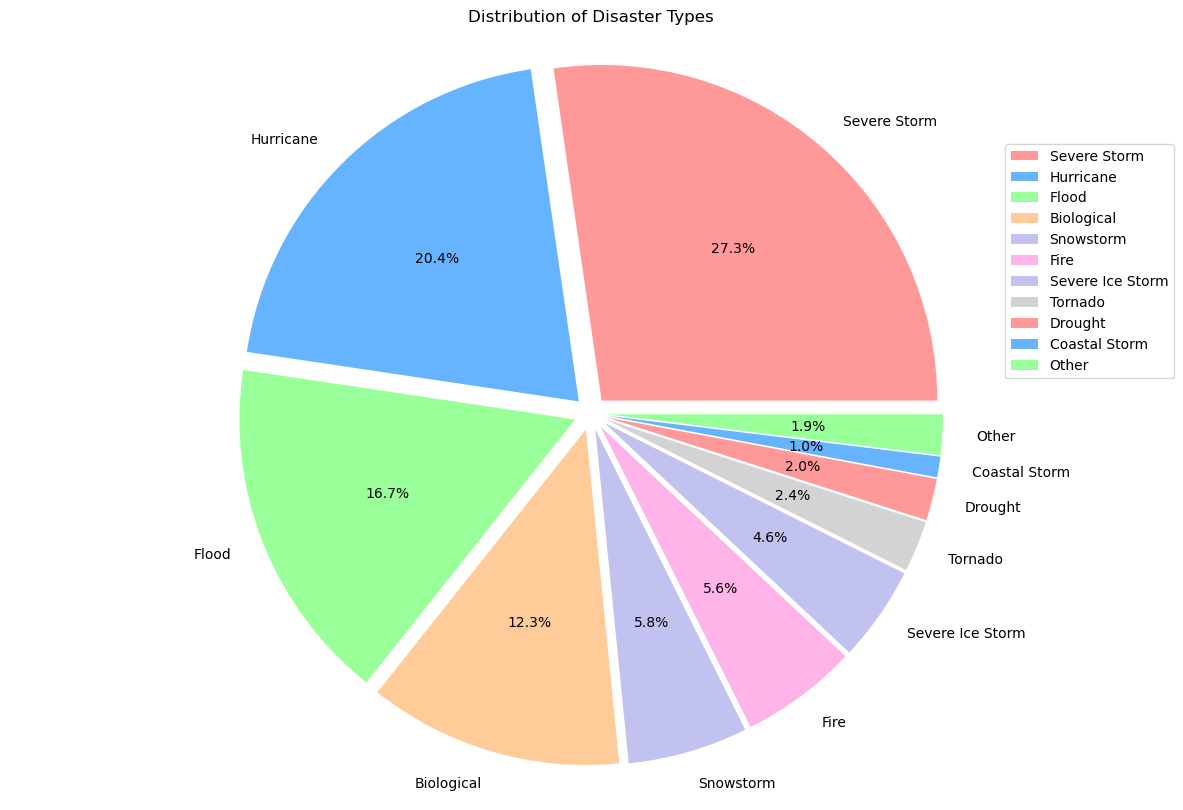

In [6]:


# Assuming you have 'disaster_counts' as a pandas Series or DataFrame

# Calculate the total count of all disaster types
total_count = disaster_counts.sum()

# Identify disaster types with counts under 2%
threshold_percentage = .5
small_counts = disaster_counts[disaster_counts / total_count * 100 < threshold_percentage]

# Sum the counts of identified disaster types to get the total count for the "other" category
other_count = small_counts.sum()

# Create a new DataFrame with disaster types above 2% and add the "other" category
grouped_disaster_counts = disaster_counts[disaster_counts / total_count * 100 >= threshold_percentage].copy()
grouped_disaster_counts['Other'] = other_count

# Set custom colors for the pie chart (optional)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0', '#d3d3d3']  # Add color for the "other" category
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05 )  # Make sure the length matches the number of segments

plt.figure(figsize=(15, 10))  # Increase the figure size for better readability

# Plot the pie chart
plt.pie(grouped_disaster_counts, labels=grouped_disaster_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a legend to display labels outside the pie chart
plt.legend(grouped_disaster_counts.index, loc='center left', bbox_to_anchor=(0.85, 0.70))

plt.title('Distribution of Disaster Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.savefig("graphics/top_10_nat_ds.png", bbox_inches='tight', dpi=300)

plt.show()

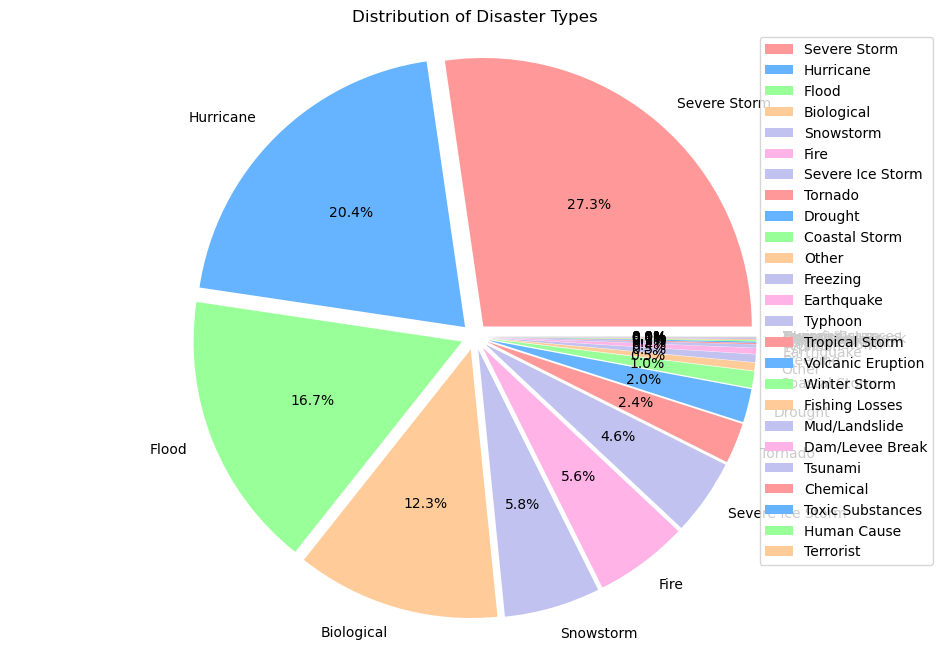

In [7]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better readability

# Set custom colors for the pie chart (optional)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0']

# Explode sections to separate them slightly (optional)
explode = (0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, )  # Make sure the length matches the number of segments

# Plot the pie chart
plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a legend to display labels outside the pie chart
plt.legend(disaster_counts.index, loc='best')

plt.title('Distribution of Disaster Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

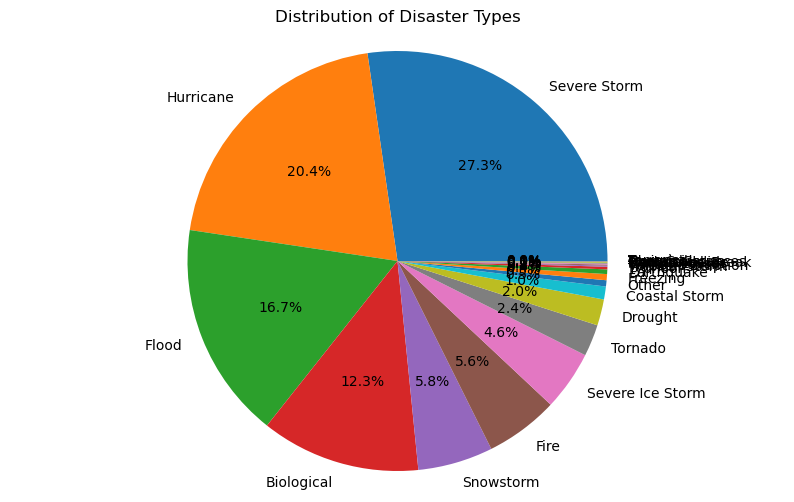

In [8]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.pie(disaster_counts, labels=disaster_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Disaster Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [9]:
unique_states = us_disasters_df['state'].unique()
disasters_per_state_counts = us_disasters_df['state'].value_counts()

# Print out the count of disaster-type instances
for states, count in disasters_per_state_counts.items():
    print(f"There are {count} occurrences of {states}")

There are 5173 occurrences of TX
There are 2704 occurrences of MO
There are 2583 occurrences of KY
There are 2524 occurrences of VA
There are 2493 occurrences of LA
There are 2474 occurrences of OK
There are 2352 occurrences of FL
There are 2278 occurrences of GA
There are 2096 occurrences of NC
There are 1987 occurrences of PR
There are 1906 occurrences of MS
There are 1848 occurrences of IA
There are 1759 occurrences of KS
There are 1665 occurrences of AL
There are 1605 occurrences of TN
There are 1599 occurrences of CA
There are 1593 occurrences of AR
There are 1563 occurrences of MN
There are 1503 occurrences of NY
There are 1485 occurrences of NE
There are 1451 occurrences of IN
There are 1430 occurrences of SD
There are 1359 occurrences of ND
There are 1283 occurrences of IL
There are 1281 occurrences of OH
There are 1239 occurrences of PA
There are 1232 occurrences of WV
There are 1019 occurrences of ME
There are 979 occurrences of WA
There are 947 occurrences of SC
There are 89

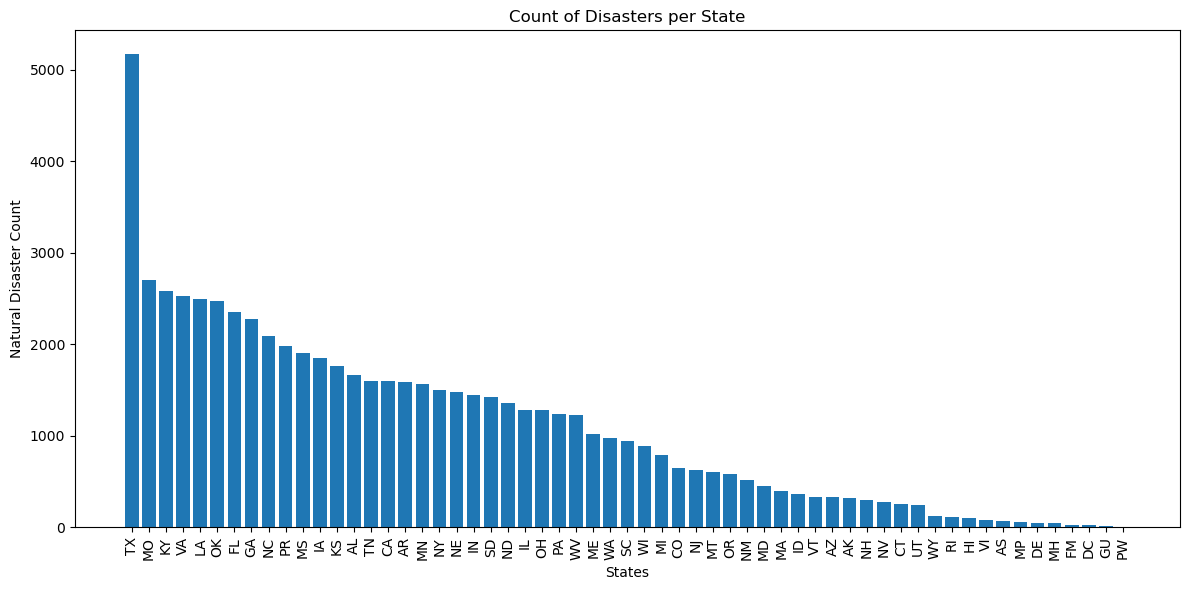

In [10]:
# Plot the bar chart
plt.figure(figsize=(12, 6))  # Set the figure size (optional)
plt.bar(disasters_per_state_counts.index, disasters_per_state_counts)
plt.xlabel('States')
plt.ylabel('Natural Disaster Count')
plt.title('Count of Disasters per State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility (optional)
# cborn
# Show the bar chart
plt.savefig("graphics/disasters_per_state.png")
plt.tight_layout()  # Ensures that the labels and title fit within the plot area
plt.show()



In [78]:
disasters_per_year = us_disasters_df.groupby('fy_declared').size()

# Display the count of natural disasters per year
print(disasters_per_year)

fy_declared
1953      10
1954      14
1955      20
1956      18
1957      18
        ... 
2019    1910
2020    9490
2021    2158
2022    1037
2023     509
Length: 71, dtype: int64


In [116]:
# Filter the DataFrame to include only fire-type natural disasters
fire_disasters_df = us_disasters_df[us_disasters_df['incident_type'] == 'Fire']


# Group the data by 'year' and count the occurrences of each year
fire_disasters_per_year = fire_disasters_df.groupby('fy_declared').size()

# Display the count of fire-type natural disasters per year
print(fire_disasters_per_year)

fy_declared
1953      1
1957      1
1960      1
1962      1
1967     10
1970      8
1971      3
1973      9
1974      3
1975      1
1976      7
1977      7
1978      2
1979      8
1980      2
1981      8
1982      2
1983      2
1984      4
1985     15
1986      1
1987      7
1988     11
1989      1
1990      8
1991      2
1992     17
1993      7
1994     26
1995      4
1996    143
1997      7
1998    123
1999    366
2000    236
2001    162
2002    192
2003     43
2004     71
2005     34
2006    438
2007     77
2008    321
2009     71
2010     25
2011    332
2012     69
2013     39
2014     41
2015     62
2016     52
2017     90
2018    105
2019     22
2020    167
2021     88
2022     57
2023      3
dtype: int64


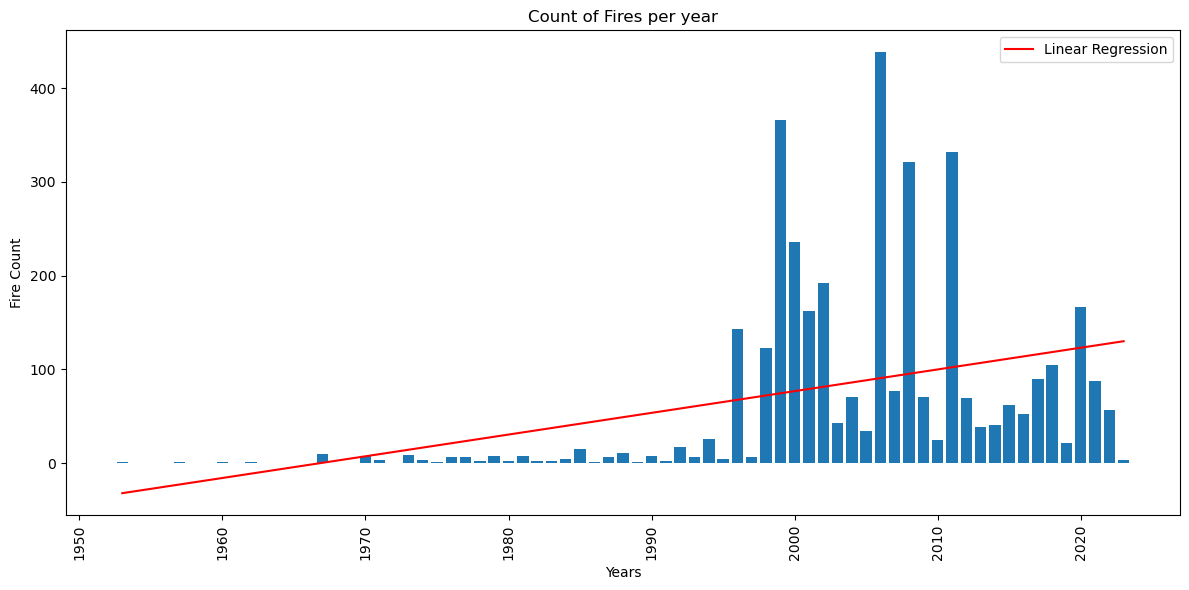

In [117]:
plt.figure(figsize=(12, 6))  # Set the figure size (optional)

# Assuming you have 'fire_disasters_per_year' as a pandas Series with years as the index and fire counts as values

# Plot the bar chart
plt.bar(fire_disasters_per_year.index, fire_disasters_per_year)
plt.xlabel('Years')
plt.ylabel('Fire Count')
plt.title('Count of Fires per year')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility (optional)

# Calculate the linear regression line
x = fire_disasters_per_year.index
y = fire_disasters_per_year.values
slope, intercept = np.polyfit(x, y, 1)  # 1 specifies linear regression

# Plot the linear regression line
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

# Show the legend to display the linear regression label
plt.legend()

# Show the bar chart with the linear regression line
plt.tight_layout()  # Ensures that the labels and title fit within the plot area
plt.show()

In [101]:
states = 'climdiv_national_year.csv'
s_url = file_path + states

avgtemp = pd.read_csv(s_url)

# Convert the 'Year' column to a numeric data type (if it's not already)
avgtemp['year'] = pd.to_numeric(avgtemp['year'], errors='coerce')

# Filter the DataFrame to include only rows with years from 1950 and up
avgtemp = avgtemp[avgtemp['year'] >= 1950]

# Now, the 'avgtemp' DataFrame contains only rows with years from 1950 and up.
print(avgtemp)

     index  year       temp      tempc
55      55  1950  51.392500  10.773611
56      56  1951  51.117500  10.620833
57      57  1952  52.271667  11.262037
58      58  1953  53.365000  11.869444
59      59  1954  53.327500  11.848611
..     ...   ...        ...        ...
120    120  2015  54.401667  12.445370
121    121  2016  54.915000  12.730556
122    122  2017  54.551667  12.528704
123    123  2018  53.518333  11.954630
124    124  2019  52.671667  11.484259

[70 rows x 4 columns]


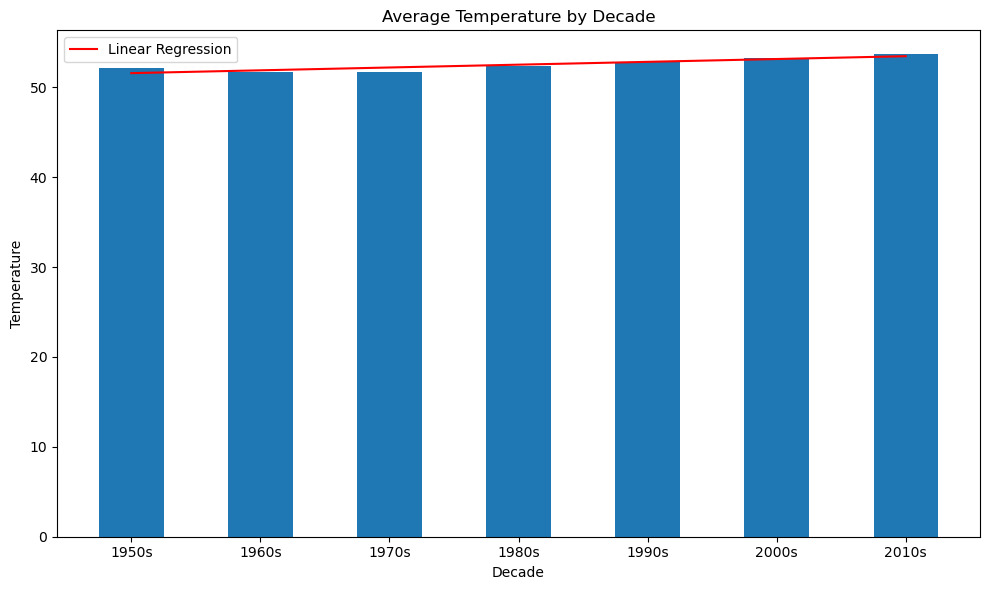

In [119]:
states = 'climdiv_national_year.csv'
s_url = file_path + states

avgtemp = pd.read_csv(s_url)

# Convert the 'Year' column to a numeric data type (if it's not already)
avgtemp['year'] = pd.to_numeric(avgtemp['year'], errors='coerce')

# Filter the DataFrame to include only rows with years from 1950 and up
avgtemp = avgtemp[avgtemp['year'] >= 1950]

# Group the data by decade and calculate the average temperature for each decade
avgtemp_by_decade = avgtemp.groupby(avgtemp['year'] // 10 * 10)['temp'].mean()

# Create a bar chart of decade vs. average temperature
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability

# Plot the bar chart
plt.bar(avgtemp_by_decade.index, avgtemp_by_decade.values, width=5)

# Set x-axis tick labels to display decades
plt.xticks(range(1950, 2021, 10), [str(decade) + 's' for decade in range(1950, 2021, 10)])

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Temperature')
plt.title('Average Temperature by Decade')

# Calculate the linear regression line
x = avgtemp_by_decade.index
y = avgtemp_by_decade.values
slope, intercept = np.polyfit(x, y, 1)  # 1 specifies linear regression

# Plot the linear regression line
plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

# Show the legend to display the linear regression label
plt.legend()

# Show the bar chart with the linear regression line
plt.tight_layout()  # Ensures that the labels and title fit within the plot area
plt.show()